# Rotation matrix and mahalanobis distance

It is possible to rotate N dimensional dataset into a space. Since mahalanobis distance uses this background information, then this space will have an impact to distance calculations.

Firstly, we shall clear away old variables.

In [51]:
rm(list=ls())

Load additional libraries for to generate random data from standard distribution. This package is missing from base jupyter-datascience docker image, so make sure to build this into your container.

We will create two datasets, one to represent local area and second as global.

In [52]:
library(mvtnorm)

sigma<-matrix(c(4,-4,-4,5),ncol=2)
mean <- c(0,0)

local <- rmvnorm(n=800, mean=mean, sigma = sigma)

global <- rnorm(200, mean=mean, 5)
global <- matrix(global, ncol=2, nrow=100)

data <- rbind(local, global)

Then, lets define a function that rotates a data matrix N degrees. To achieve this, we have to multiply our dataset with a newly created rotation matrix. Note that $\sin$ and $\cos$ functions in R use radians instead of degrees, we we have to convert this into degree form with $\pi$ formula. This skews our results because of floating point issues, but result is good enough.

In [53]:
rotate <- function(deg, data) {
  rad <- (pi / 180)*deg
  form <- c(cos(rad), sin(rad), -sin(rad), cos(rad))
  rotMatr <- matrix(form,ncol=2, nrow=2)
  
  data2 <- matrix(,ncol=ncol(data),nrow=nrow(data))
  
  for(i in seq_along(1:nrow(data))) {
    pp <- rotMatr%*%data[i,]
    data2[i,] <- pp
  }
  return(data2)
}

Remember mahalanobis distance from [distance notebook](distances.ipynb).

In [54]:
myMahal <- function(A, B, invCOV) {
  diff = A - B
  dist = sqrt( t(diff) %*% invCOV %*% diff )
  return(dist)
}

Now we will rotate our generated dataset while measuring distance between two points as background changes. The two arbitrarily chosen points remain stationary.

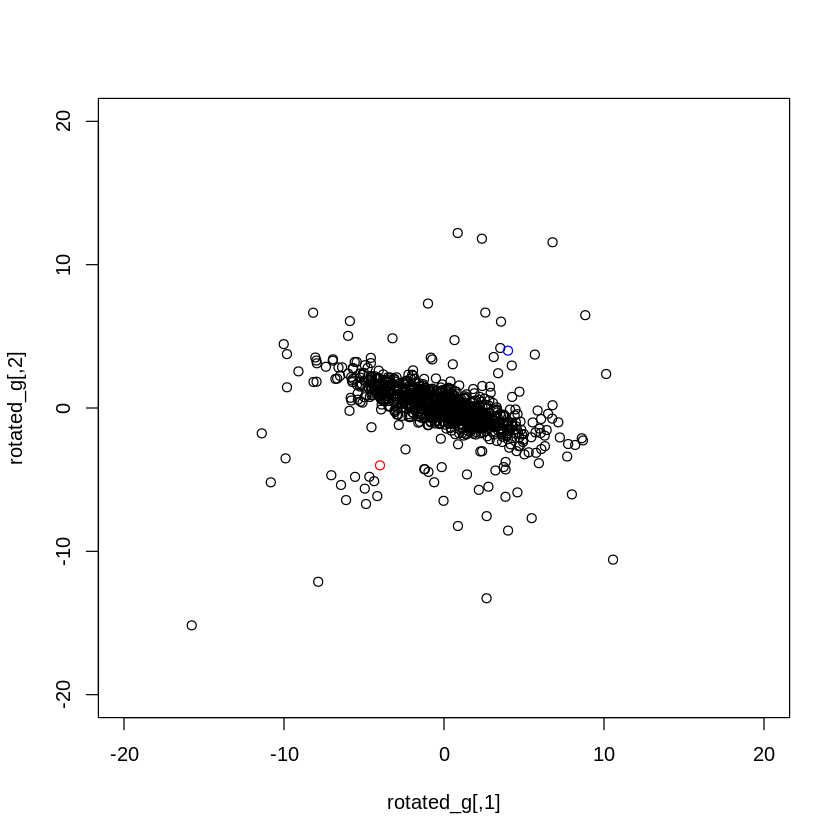

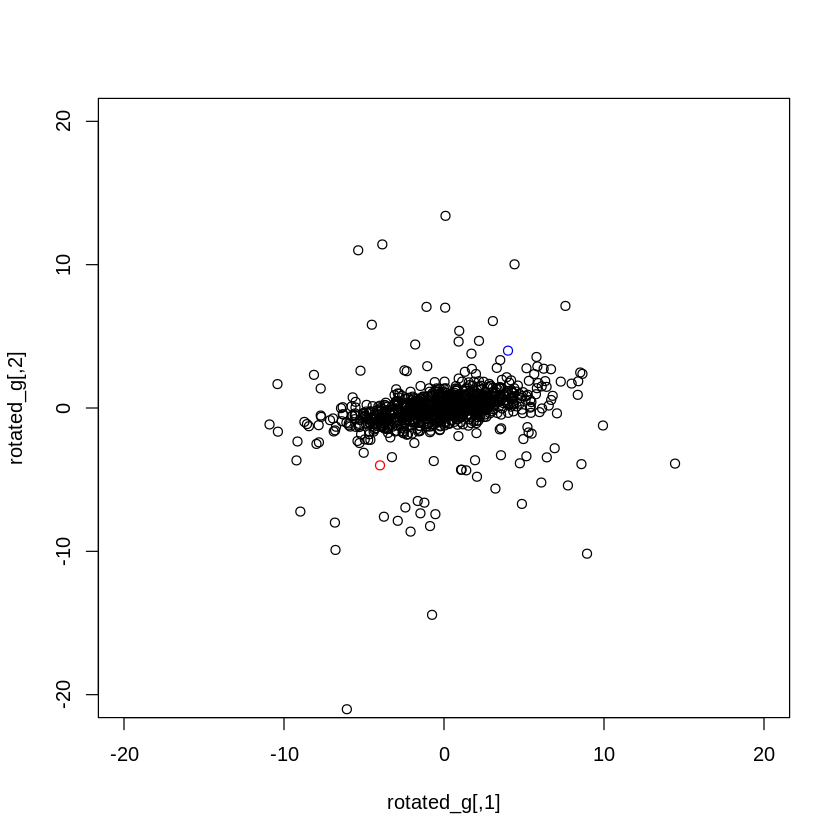

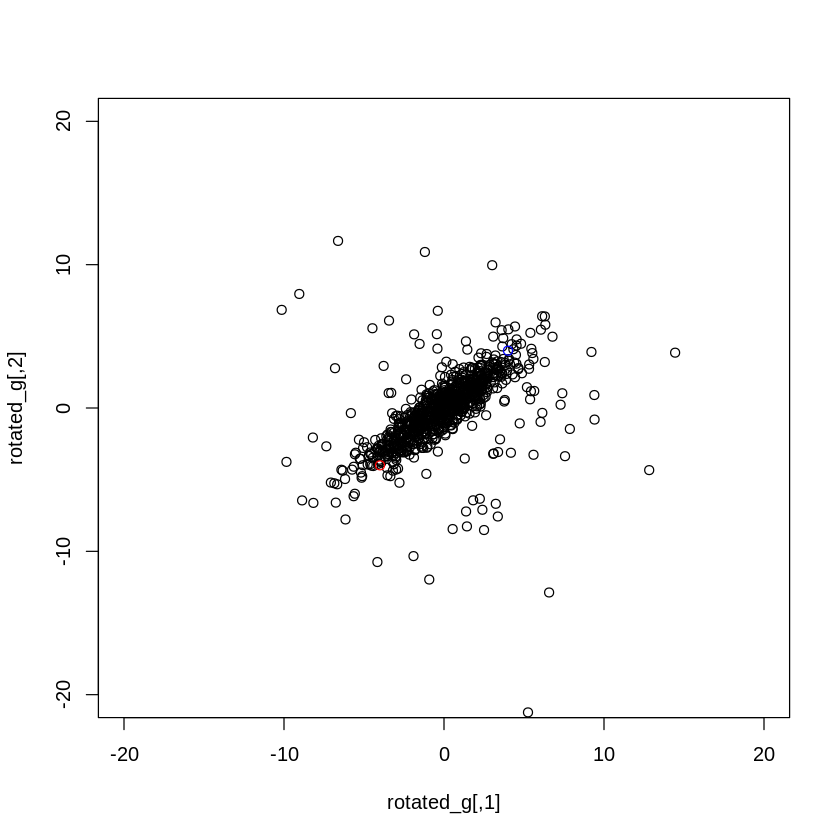

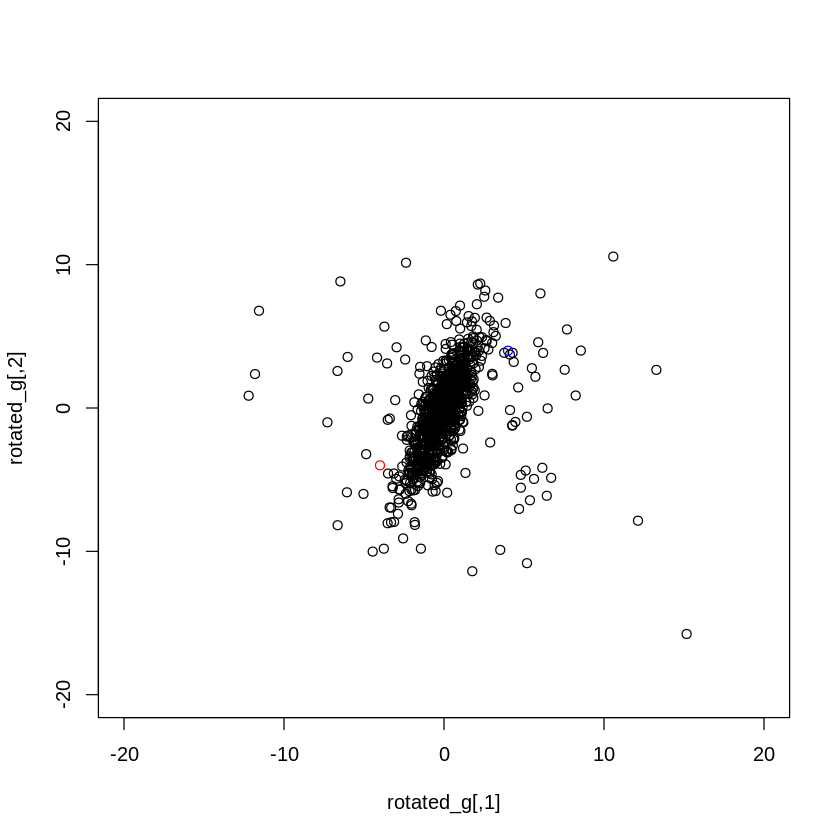

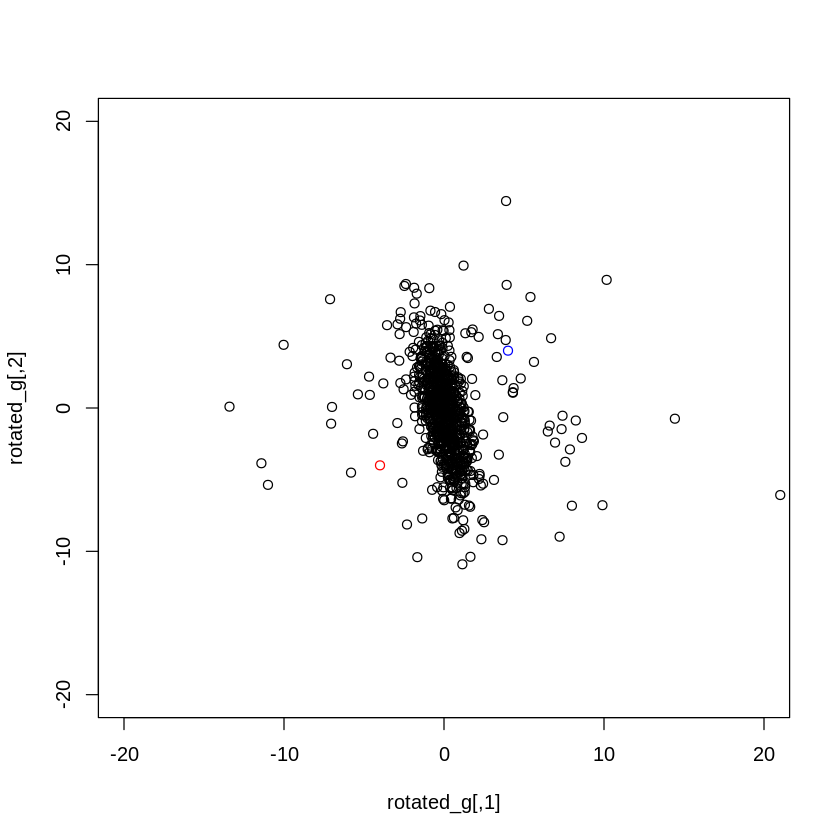

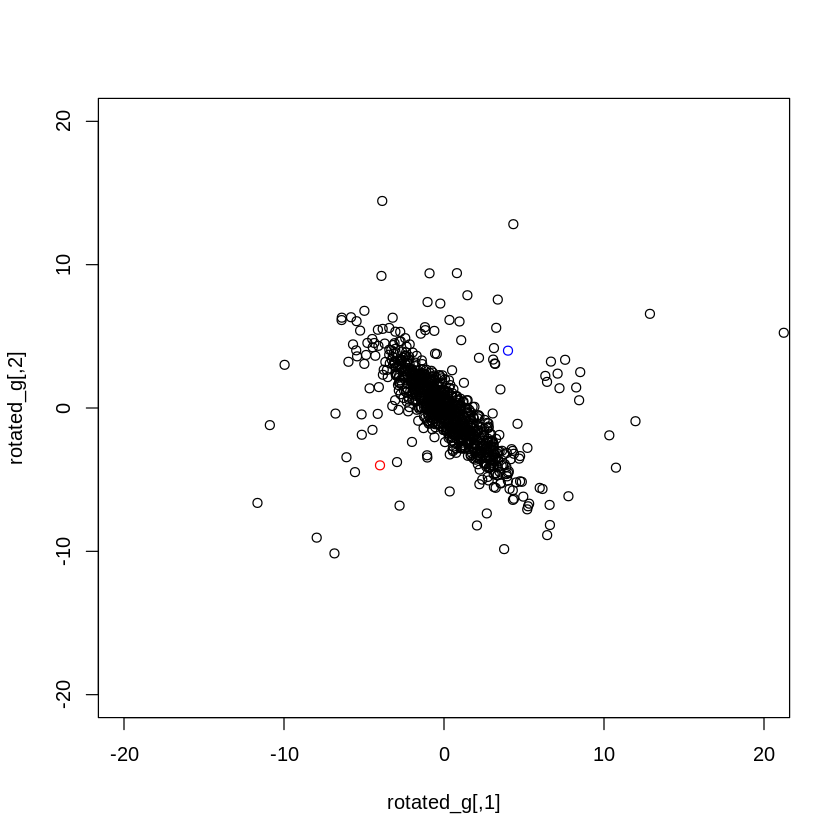

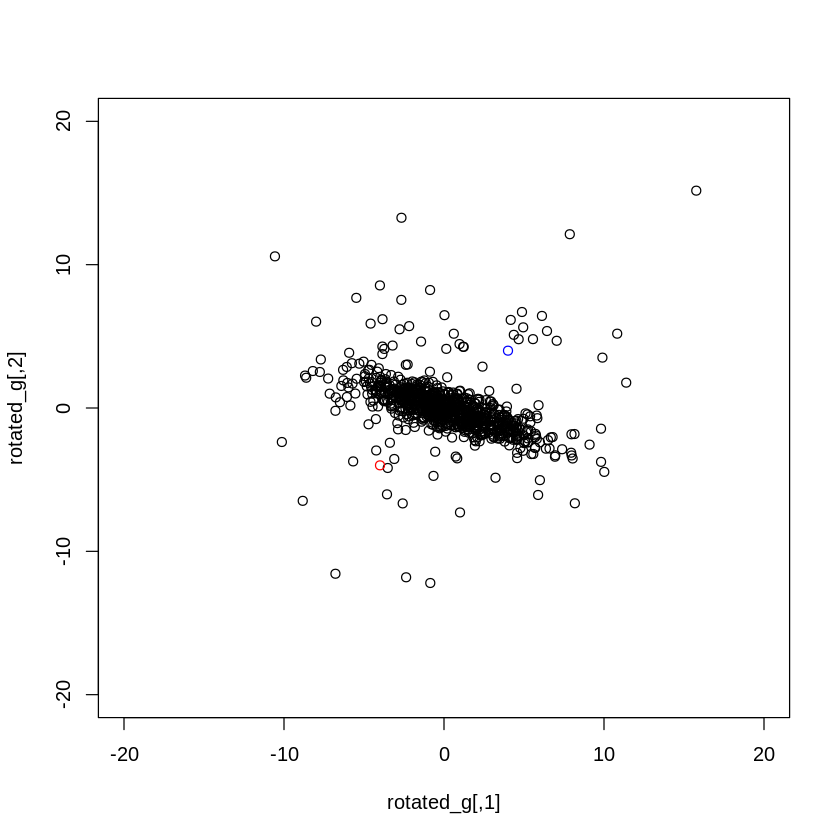

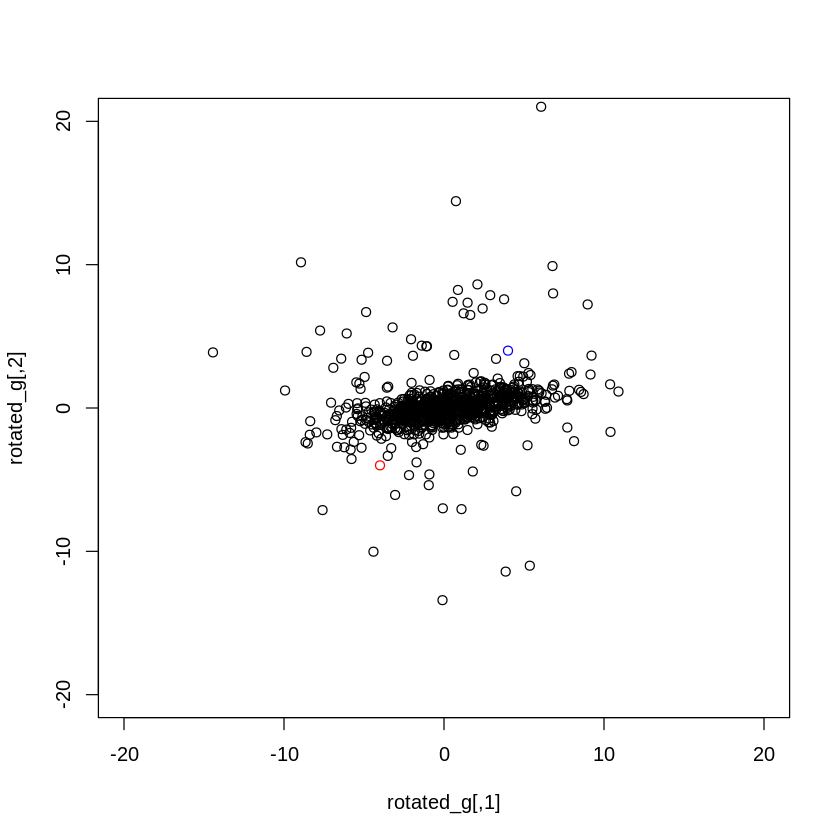

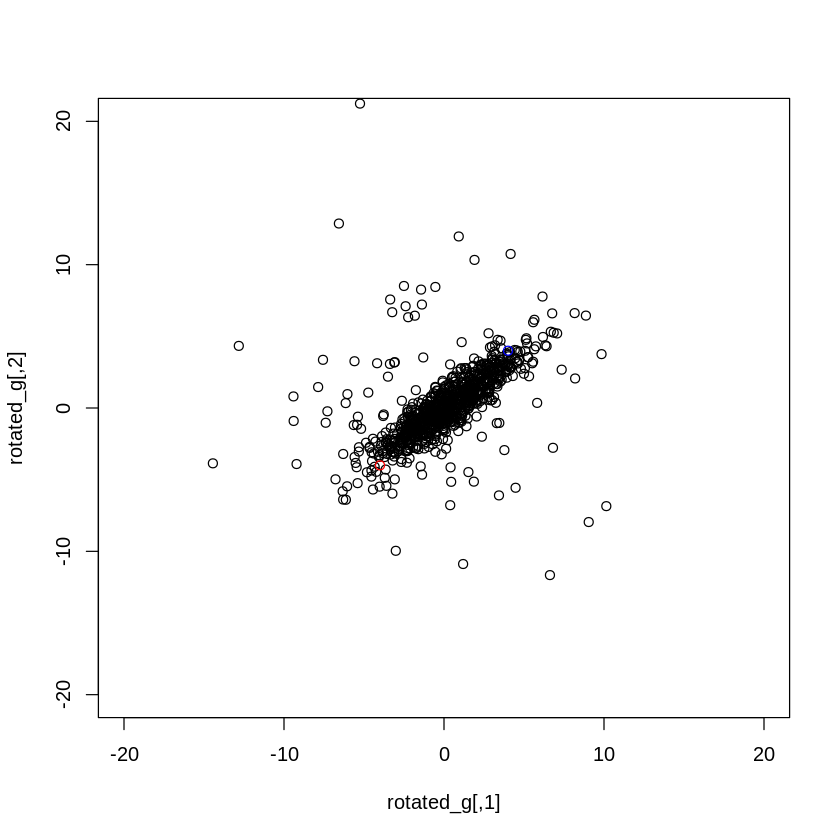

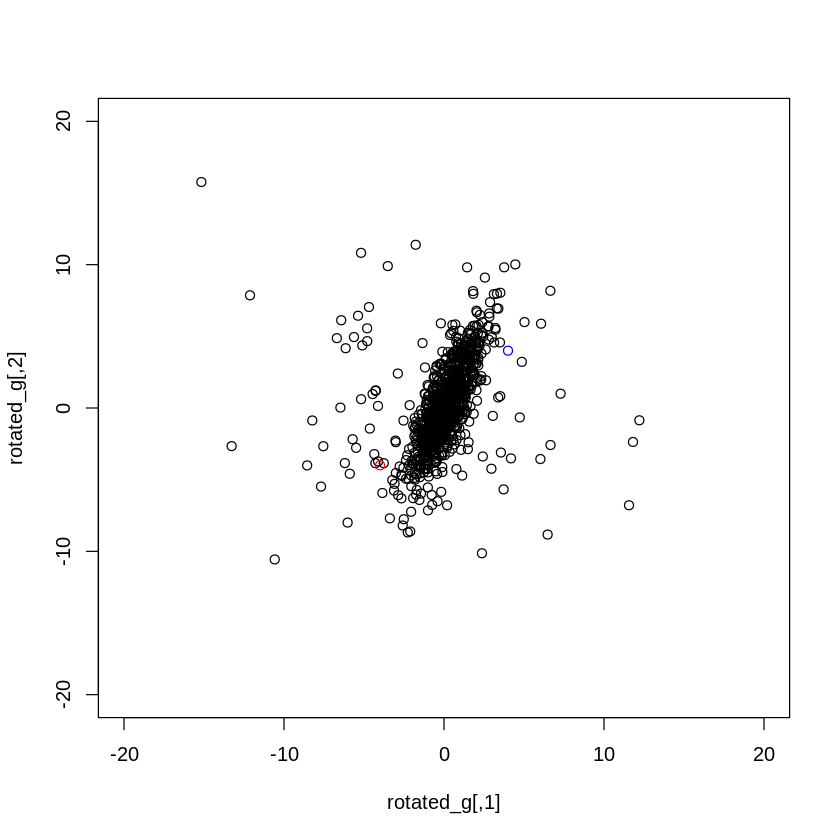

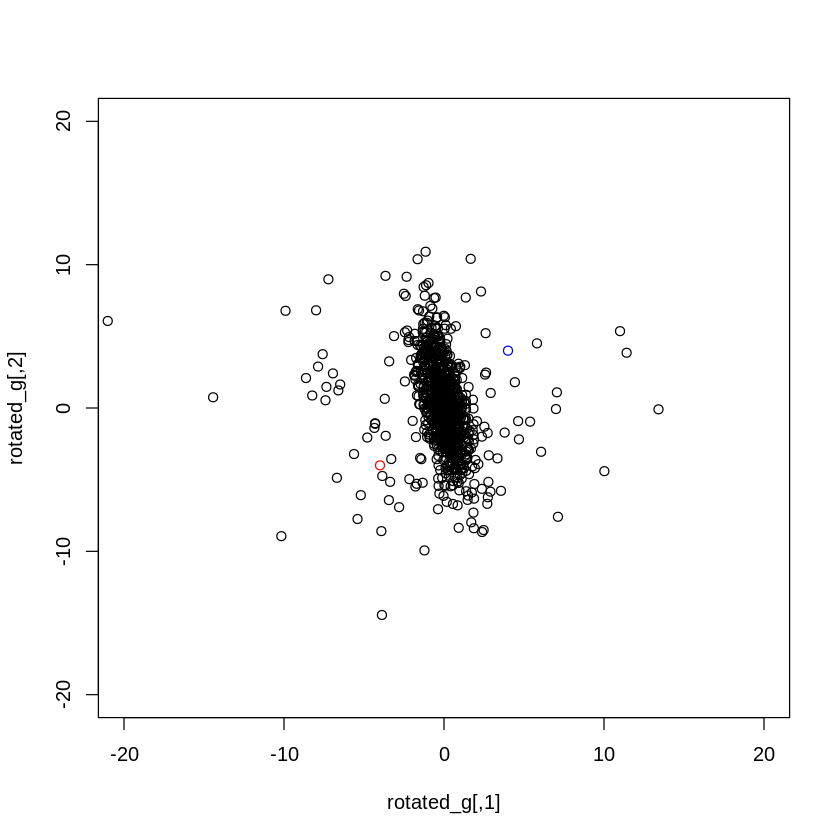

null device 
          1

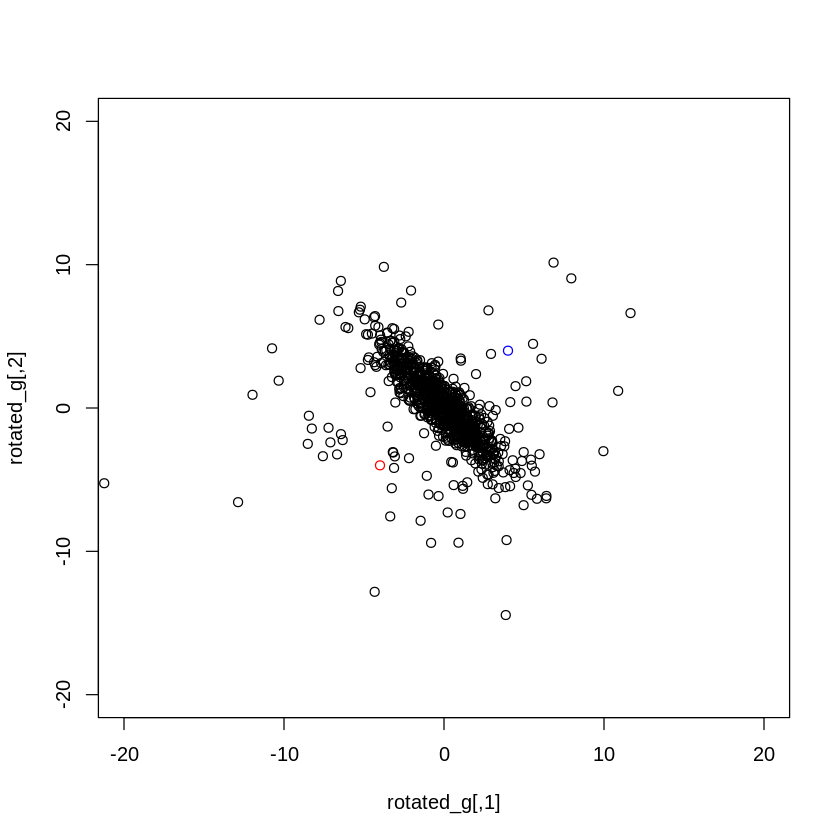

In [55]:
DEBUG <- TRUE

point1 <- c(-4,-4)
point2 <- c(4,4)

distances_l <- c()
distances_g <- c()

max_deg <- 360
print_on <- 30

for( deg in seq_along(1:max_deg)) {
  rotated_l <- rotate(deg, local)
  rotated_g <- rotate(deg, data)
  covar_l <- solve(cov(rotated_l))
  covar_g <- solve(cov(rotated_g))
  distances_l[deg] <- myMahal(point1, point2, covar_l)
  distances_g[deg] <- myMahal(point1, point2, covar_g)
    
  if(DEBUG==TRUE) {
    if (deg %% print_on == 0) {
        plot(rotated_g, xlim=c(-20,20), ylim=c(-20,20))
        points(point1[1], point1[2], col = "red")
        points(point2[1], point2[2], col = "blue")
    }
    #Sys.sleep(0.1*1)
  }
}
dev.off()

Finally, we can plot the measured distances. Note how the distance between points changes as our dataset expands and contracts during rotation. Effects are more severe in local dataset as global set is more spread out and thus its properties change less.

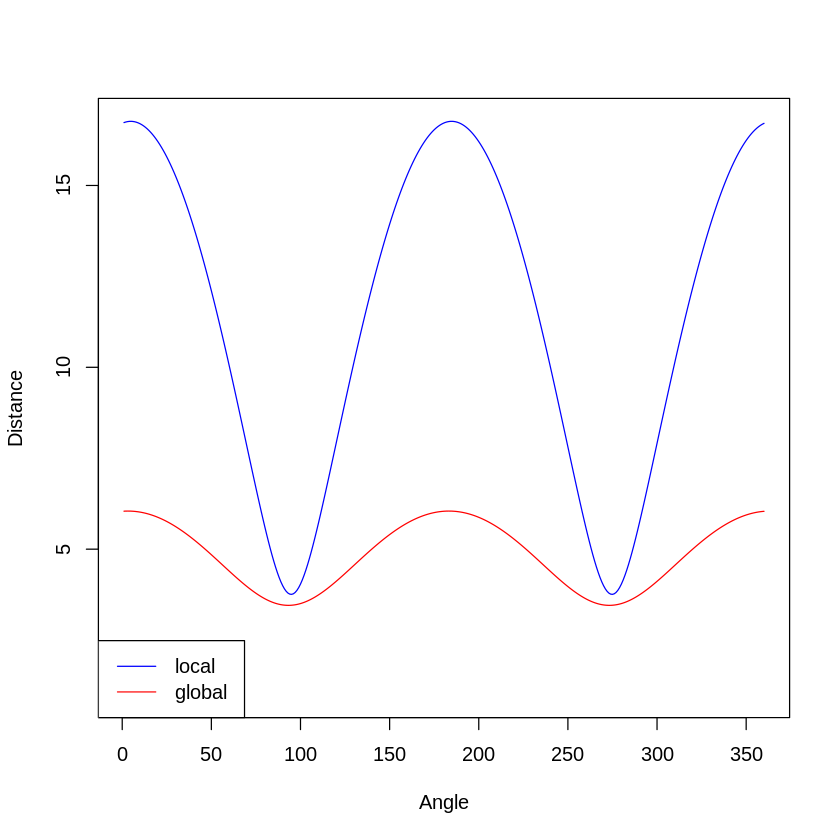

In [56]:
plot(0, xlim=c(1,max_deg), ylim=c(1,max(distances_l)), xlab = "Angle", ylab = "Distance", type="n")
lines(distances_l, type= "l", col="blue")
lines(distances_g, type= "l", col="red")
legend("bottomleft", lty= c(1,1), legend=c("local", "global"), col=c("blue", "red"))